<font size=4 >First load the required libraries.</font>

In [268]:
import numpy as np
import pandas as pd
import datetime
import random

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor

from sklearn.linear_model import Ridge, RidgeCV
from xgboost import XGBRegressor

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error

from sklearn.pipeline import make_pipeline

pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings(action="ignore")

1.load and view data
===

In [269]:
# Read Data form local file path
train_df = pd.read_csv("train.csv",index_col=0)
test_df = pd.read_csv("test.csv",index_col=0)

In [270]:
# Display the data shape
train_df.shape

(1460, 80)

In [271]:
# Display the first five rows of data
train_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [272]:
# Display the data shape
test_df.shape

(1459, 79)

In [273]:
# Display the first five rows of data
test_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


<font size=4 >Merge datasets for subsequent processing.</font>

In [274]:
# Merge the data of train and test for data processing
all_df = pd.concat((train_df,test_df),axis=0)

In [275]:
all_df.shape

(2919, 80)

In [276]:
all_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


2.EDA
===

2.1 View price distribution
---

<font size=4 >First, draw a histogram of the price distribution to see which price range has the most houses. From the graph, it can be observed that the distribution of property prices closely resembles a normal distribution. This indicates that selecting the appropriate fitting parameters can lead to better predictions of price trends.</font>

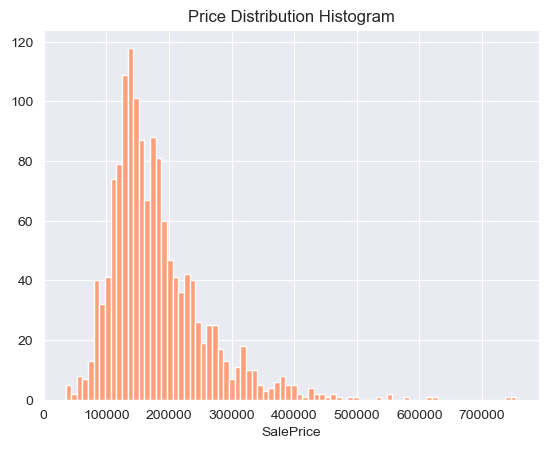

In [277]:
# Draw a histogram of the distribution of prices
sns.set_style('darkgrid')
plt.hist(all_df.SalePrice,bins=80,color=['lightsalmon'])

plt.title("Price Distribution Histogram")
plt.xlabel("SalePrice")


plt.show()

2.2 Significant numerical predictors
---

2.2.1 Correlation between numeric variables and house prices
---

<font size=4 >I start by looking at which numeric variables have a high correlation with sales price.</font>

In [278]:
# View database column types
all_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 1 to 2919
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2915 non-null   object 
 2   LotFrontage    2433 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          198 non-null    object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2917 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuil

In [279]:
# Pick out numeric attributes
numerical_df = train_df.select_dtypes(include=('int64','float64'))

In [280]:
# Filter out the features with the absolute value of the correlation coefficient greater than 0.5
threshold = 0.5
all_corr = numerical_df.corr()
top_corr_features = all_corr.index[abs(all_corr["SalePrice"])>threshold]

<font size=4 >List numerical features with a correlation higher than 0.5 with SalePrice in descending order.</font>

Text(0.5, 1.0, 'House Price Correlation Heat Map')

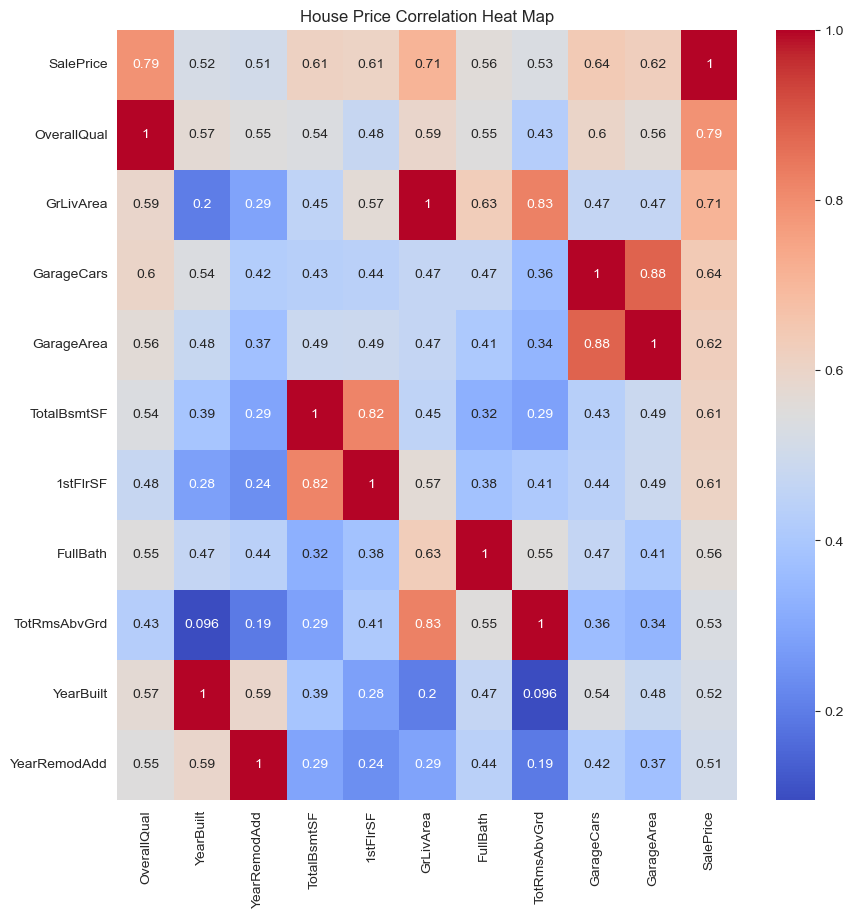

In [281]:
# Draw a heat map
plt.figure(figsize=(10,10))
g = sns.heatmap(numerical_df[top_corr_features].corr().sort_values('SalePrice', 
                                                            ascending=False),annot=True,cmap="coolwarm")
plt.title("House Price Correlation Heat Map")

<font size=4 >It can be seen that a total of 10 numeric variables have a correlation of at least 0.5 with SalePrice. All these correlations are positive.Besides,there is multicollinearity between GarageCars and GarageArea, with a high correlation of 0.89.</font>

<font size=4 >I will visualize the relationship between SalePrice and the two predictors most correlated with SalePrice; 'OverallQual' and 'GrLivArea'.</font>

2.2.2 Overall Quality
---

<font size=4 >The correlation between overall quality and sales price is as high as 0.79. It rates the overall material and finish of the house on a scale of 1 (very poor) to 10 (excellent).</font>

Text(0.5, 1.0, 'OverallQual vs SalePrice')

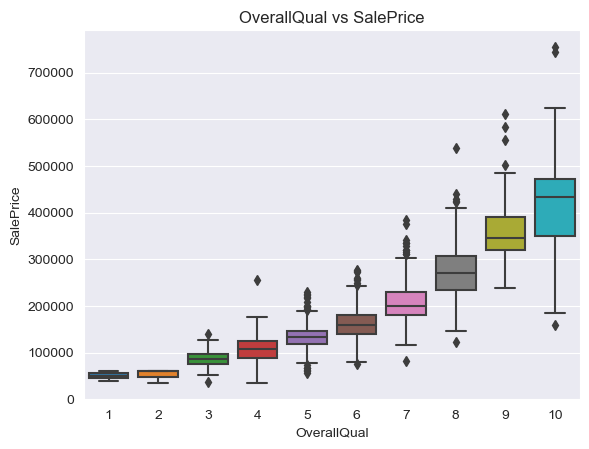

In [282]:
# Boxplot of the relationship between 'Overall Quality' and 'SalePrice'
sns.boxplot(x='OverallQual', y='SalePrice', data=all_df)
plt.title("OverallQual vs SalePrice")

<font size=4 >The obvious positive correlation between them can be observed.</font>

2.2.3 GrLivArea
---

<font size=4 >The second highest numerical variable in correlation with SalesPrice is Above Grade Living Area (0.71). After all, larger houses are generally more expensive.</font>

Text(0, 0.5, 'SalePrice')

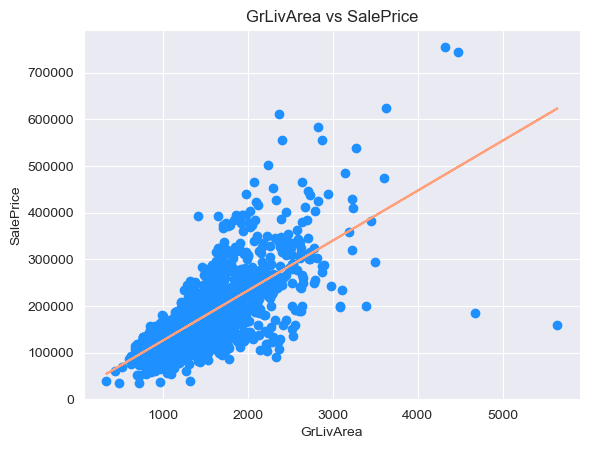

In [283]:
# Plot the linear correlation between GrLivArea and SalePrice
plt.scatter(train_df['GrLivArea'],train_df.SalePrice,color = 'dodgerblue')
model1 = np.poly1d(np.polyfit(train_df['GrLivArea'], train_df.SalePrice, 1))
polyline = train_df['GrLivArea'].unique()
plt.plot(polyline, model1(polyline), color='lightsalmon')
plt.title("GrLivArea vs SalePrice")
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")

<font size=4 >From the graph, it can be observed that there are two outliers, which are the two houses with significantly larger living areas but lower SalePrices. I will remove these two outliers.</font>

3.Default value padding and variable type conversion
===

3.1 View default and 0 values
---

In [284]:
# View missing values 
missing_list = all_df.isnull().sum().sort_values(ascending=False)
missing_list.head(36)

PoolQC          2909
MiscFeature     2814
Alley           2721
Fence           2348
SalePrice       1459
FireplaceQu     1420
LotFrontage      486
GarageCond       159
GarageFinish     159
GarageQual       159
GarageYrBlt      159
GarageType       157
BsmtCond          82
BsmtExposure      82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
MSZoning           4
BsmtHalfBath       2
Utilities          2
BsmtFullBath       2
Functional         2
Exterior2nd        1
Exterior1st        1
GarageArea         1
GarageCars         1
SaleType           1
KitchenQual        1
BsmtFinSF1         1
Electrical         1
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
TotRmsAbvGrd       0
dtype: int64

In [285]:
# View zero values 
zero_list = all_df.astype(bool).sum(axis=0)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(zero_list.sort_values(ascending = True))

PoolArea           13
3SsnPorch          37
LowQualFinSF       40
MiscVal           103
BsmtHalfBath      177
ScreenPorch       256
BsmtFinSF2        348
EnclosedPorch     459
HalfBath         1085
MasVnrArea       1181
BsmtFullBath     1214
2ndFlrSF         1251
WoodDeckSF       1396
Fireplaces       1499
OpenPorchSF      1621
BsmtFinSF1       1990
BsmtUnfSF        2678
GarageArea       2762
GarageCars       2762
TotalBsmtSF      2841
FullBath         2907
BedroomAbvGr     2911
KitchenAbvGr     2916
KitchenQual      2919
GrLivArea        2919
MSSubClass       2919
GarageYrBlt      2919
Functional       2919
FireplaceQu      2919
GarageType       2919
GarageFinish     2919
GarageQual       2919
GarageCond       2919
PavedDrive       2919
PoolQC           2919
Fence            2919
MiscFeature      2919
MoSold           2919
YrSold           2919
SaleType         2919
TotRmsAbvGrd     2919
1stFlrSF         2919
HeatingQC        2919
CentralAir       2919
HouseStyle       2919
BldgType  

<font size=4 >"PoolQC"</font> 
<font size=4 >"MiscFeature"</font>     
<font size=4 >"Alley"</font>  
<font size=4 >"Fence"</font>       
<font size=4 >"FireplaceQu"</font>

<font size=4 >These 5 columns have missing values over 50%, so it has to be done with droping them.</font>

<font size=4 >"PoolArea" </font>          
<font size=4 >"3SsnPorch" </font>         
<font size=4 >"LowQualFinSF"</font>
<font size=4 >"MiscVal"</font>          
<font size=4 >"BsmtHalfBath"</font>      
<font size=4 >"ScreenPorch"</font>      
<font size=4 >"BsmtFinSF2"</font>       
<font size=4 >"EnclosedPorch"</font>
<font size=4 >"HalfBath"</font>         
<font size=4 >"MasVnrArea"</font>      
<font size=4 >"BsmtFullBath"</font>   
<font size=4 >"2ndFlrSF"</font>       
<font size=4 >"WoodDeckSF"</font>      
<font size=4 >"Fireplaces"</font>       

<font size=4 >These 14 columns have zero values over 50%, so it has to be done with droping them.</font>

In [286]:
# Drop operations on columns that do not need to be processed
drop_list = ["FireplaceQu","PoolQC",  "MiscFeature", "MiscVal","Utilities",
             "Alley", "Fence", "PoolArea", "3SsnPorch", "LowQualFinSF", 
              "BsmtHalfBath", "ScreenPorch", "BsmtFinSF2", "EnclosedPorch",
             "HalfBath", "MasVnrArea", "BsmtFullBath", "2ndFlrSF", "WoodDeckSF", 
             "Fireplaces"]
all_drop_df = all_df.drop(columns=drop_list)

In [287]:
all_drop_df.shape

(2919, 60)

In [288]:
all_drop_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,GrLivArea,FullBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,OpenPorchSF,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,150.0,856.0,GasA,Ex,Y,SBrkr,856,1710,2,3,1,Gd,8,Typ,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,61,2,2008,WD,Normal,208500.0
2,20,RL,80.0,9600,Pave,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,1262,2,3,1,TA,6,Typ,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,0,5,2007,WD,Normal,181500.0
3,60,RL,68.0,11250,Pave,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,434.0,920.0,GasA,Ex,Y,SBrkr,920,1786,2,3,1,Gd,6,Typ,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,42,9,2008,WD,Normal,223500.0
4,70,RL,60.0,9550,Pave,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,540.0,756.0,GasA,Gd,Y,SBrkr,961,1717,1,3,1,Gd,7,Typ,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,35,2,2006,WD,Abnorml,140000.0
5,60,RL,84.0,14260,Pave,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,2198,2,4,1,Gd,9,Typ,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,84,12,2008,WD,Normal,250000.0


3.2 Imputing missing data
---

<font size=4 >I choose three ways to fill missing values:</font>

<font size=4 >1.I will fill the rest of the attribute default values with 'modes'</font>

<font size=4 >2.For the default value in the classification column I will fill it with 'None'</font>

<font size=4 >3.Fill the 'LotFrontage' default with the 'median'</font>

<font size=4 >3.For the 'GarageYrBlt' variable, I will fill it with the value of 'YearBuilt'</font>

<font size=4 >4.Finally delete the 'Utilities' column</font>


In [289]:
list_with_na = [ "LotFrontage", "GarageCond", "GarageFinish", "GarageQual",       
                "GarageYrBlt", "GarageType",  "BsmtCond", "BsmtExposure", "BsmtQual",          
                "BsmtFinType2", "BsmtFinType1", "MasVnrType",  "MSZoning",           
                   "Functional", "Exterior2nd",        
                "Exterior1st", "GarageArea", "GarageCars", "SaleType", "KitchenQual",        
                "BsmtFinSF1", "Electrical",  "BsmtUnfSF", "TotalBsmtSF",   ]  
for item in list_with_na:
    print(item)
    print(all_drop_df[item].unique())
    

LotFrontage
[ 65.  80.  68.  60.  84.  85.  75.  nan  51.  50.  70.  91.  72.  66.
 101.  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52.
 100.  24.  89.  63.  76.  81.  95.  69.  21.  32.  78. 121. 122.  40.
 105.  73.  77.  64.  94.  34.  90.  55.  88.  82.  71. 120. 107.  92.
 134.  62.  86. 141.  97.  54.  41.  79. 174.  99.  67.  83.  43. 103.
  93.  30. 129. 140.  35.  37. 118.  87. 116. 150. 111.  49.  96.  59.
  36.  56. 102.  58.  38. 109. 130.  53. 137.  45. 106. 104.  42.  39.
 144. 114. 128. 149. 313. 168. 182. 138. 160. 152. 124. 153.  46.  26.
  25. 119.  31.  28. 117. 113. 125. 135. 136.  22. 123. 195. 155. 126.
 200. 131. 133.]
GarageCond
['TA' 'Fa' nan 'Gd' 'Po' 'Ex']
GarageFinish
['RFn' 'Unf' 'Fin' nan]
GarageQual
['TA' 'Fa' 'Gd' nan 'Ex' 'Po']
GarageYrBlt
[2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2006. 1960. 1991. 1970. 1967. 1958. 1930. 2002. 1968. 2007. 2008.
 1957. 1920. 1966. 1959. 1995. 1954. 1953.   nan 1983

<font size=4 >"KitchenQual"        1</font>

<font size=4 >"MSZoning"          4</font>

<font size=4 >"Functional"        2</font>

<font size=4 >"Exterior2nd"        1</font>

<font size=4 >"Exterior1st"        1</font>

<font size=4 >"SaleType"          1</font>

<font size=4 >"Electrical"         1</font>

<font size=4 >"GarageArea"         1</font>

<font size=4 >"GarageCars"         1</font>

<font size=4 >"BsmtFinSF1"         1</font>

<font size=4 >"BsmtUnfSF"          1</font>

<font size=4 >"TotalBsmtSF"        1</font>

<font size=4 >These fitures contain very little missing values, thus, we can fill them with their modes.</font>

In [290]:
# Fill default values with modes
mode_list = ["KitchenQual","MSZoning","Functional","Exterior2nd","Exterior1st",
                "SaleType","Electrical","GarageArea","GarageCars","BsmtFinSF1",
                "BsmtUnfSF","TotalBsmtSF"]
for item in mode_list:
        all_drop_df[item].fillna((all_drop_df[item].mode()[0]),inplace = True)

<font size=4 >"GarageCond"       159     ['TA' 'Fa' nan 'Gd' 'Po' 'Ex']</font>

<font size=4 >"GarageQual"       159     ['TA' 'Fa' 'Gd' nan 'Ex' 'Po']</font>

<font size=4 >"GarageFinish"     159     ['RFn' 'Unf' 'Fin' nan]</font>

<font size=4 >"GarageType"       157     ['Attchd' 'Detchd' 'BuiltIn' 'CarPort' nan 'Basment' '2Types']</font>


<font size=4 >"BsmtExposure"      82         ['No' 'Gd' 'Mn' 'Av' nan]</font>

<font size=4 >"BsmtFinType2"      80         ['Unf' 'BLQ' nan 'ALQ' 'Rec' 'LwQ' 'GLQ']</font>

<font size=4 >"BsmtFinType1"      79         ['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' nan 'LwQ']</font>

<font size=4 >"MasVnrType"        24         ['BrkFace' 'None' 'Stone' 'BrkCmn' nan]</font>

<font size=4 >"BsmtCond"          82          ['TA' 'Gd' nan 'Fa' 'Po']</font>

<font size=4 >"BsmtQual"          81          ['Gd' 'TA' 'Ex' nan 'Fa']</font>

<font size=4 >These four columns have too many missing values, which are also catogerical values. Thus, we can fill them with "None" catogery.</font>





In [291]:
fill_none_list = ["GarageQual","GarageCond", "GarageType",  "GarageFinish",
                 "BsmtExposure","BsmtFinType2","BsmtFinType1","MasVnrType",
                  "BsmtCond","BsmtQual" ]

for item in fill_none_list:
    all_drop_df[item].fillna('None', inplace =True) 

In [292]:
# Fill it with the value of 'YearBuilt'
all_drop_df['GarageYrBlt'].fillna(all_drop_df['YearBuilt'], inplace =True) 

In [293]:
# Fill the 'LotFrontage' default with the average
all_drop_df['LotFrontage'].fillna(all_drop_df['LotFrontage'].median(),inplace = True)

In [294]:
# View missing values 
missing_list = all_drop_df.isnull().sum().sort_values(ascending=False)
missing_list.head()

SalePrice      1459
MSZoning          0
BsmtUnfSF         0
TotalBsmtSF       0
Heating           0
dtype: int64

In [295]:
all_drop_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 1 to 2919
Data columns (total 60 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2919 non-null   object 
 2   LotFrontage    2919 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   LotShape       2919 non-null   object 
 6   LandContour    2919 non-null   object 
 7   LotConfig      2919 non-null   object 
 8   LandSlope      2919 non-null   object 
 9   Neighborhood   2919 non-null   object 
 10  Condition1     2919 non-null   object 
 11  Condition2     2919 non-null   object 
 12  BldgType       2919 non-null   object 
 13  HouseStyle     2919 non-null   object 
 14  OverallQual    2919 non-null   int64  
 15  OverallCond    2919 non-null   int64  
 16  YearBuilt      2919 non-null   int64  
 17  YearRemodAdd   2919 non-null   int64  
 18  RoofStyl

3.3 Transform some numerical variables into categorical variables
---

<font size=4 >"YrSold", "MoSold" and "MSSubClass" are three variable types that are numeric, but they are actually categorical variables. Therefore, I converted their categories into categorical variables.</font>

In [296]:
num_str_list = ["MSSubClass","YearBuilt" ,"YearRemodAdd",
                "GarageYrBlt","MoSold","YrSold"]

In [297]:
# Transform numerical variables into categorical variables
for item in  num_str_list:
    all_drop_df[item]= all_drop_df[item].astype(str)


3.4 Label Encoding for Categorical Variables
---

<font size=4 >I am performing label encoding on some categorical variables because the values are ordered, which allows for better observation of linear correlations.</font>

In [298]:
column_dict = {'None':0, 'Po' : 1, 'Fa' : 2, 'TA' : 3, 'Gd' : 4, 'Ex' : 5}

all_drop_df = all_drop_df.replace({'ExterQual': column_dict,
                                   'ExterCond':column_dict,
                                   'BsmtQual':column_dict,
                                   'BsmtCond':column_dict,
                                   'HeatingQC':column_dict,
                                   'KitchenQual':column_dict,
                                   'GarageQual':column_dict,
                                   'GarageCond':column_dict})

In [299]:
# After the data processing is completed, the data is re-divided into train and test parts
train_drop_df = all_drop_df.loc[train_df.index]
test_drop_df = all_drop_df.loc[test_df.index]

4.Visualization
===

4.1 Correlations again
---

In [300]:
# Pick out numeric attributes
numerical_df = train_drop_df.select_dtypes(include=('int64','float64'))

In [301]:
# Filter out the features with the absolute value of the correlation coefficient greater than 0.5
threshold = 0.5
all_corr = numerical_df.corr()
top_corr_features = all_corr.index[abs(all_corr["SalePrice"])>threshold]

Text(0.5, 1.0, 'House Price Correlation Heat Map')

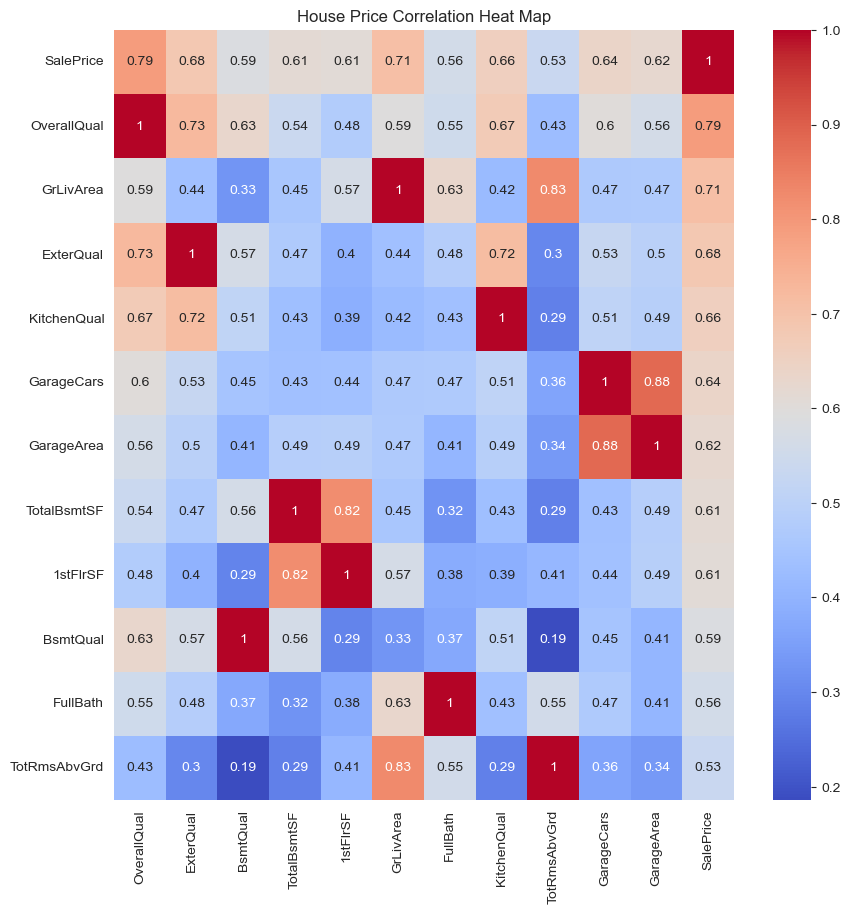

In [302]:
# Draw a heat map
plt.figure(figsize=(10,10))
g = sns.heatmap(numerical_df[top_corr_features].corr().sort_values('SalePrice', 
                                                            ascending=False),annot=True,cmap="coolwarm")
plt.title("House Price Correlation Heat Map")

<font size=4 >I have rechecked the correlations. It can be observed that the number of variables with a correlation of at least 0.5 with SalePrice has increased from 10 to 16 after data processing.</font>

4.2 Visual analysis of GrLivArea and other surface-related variables
---

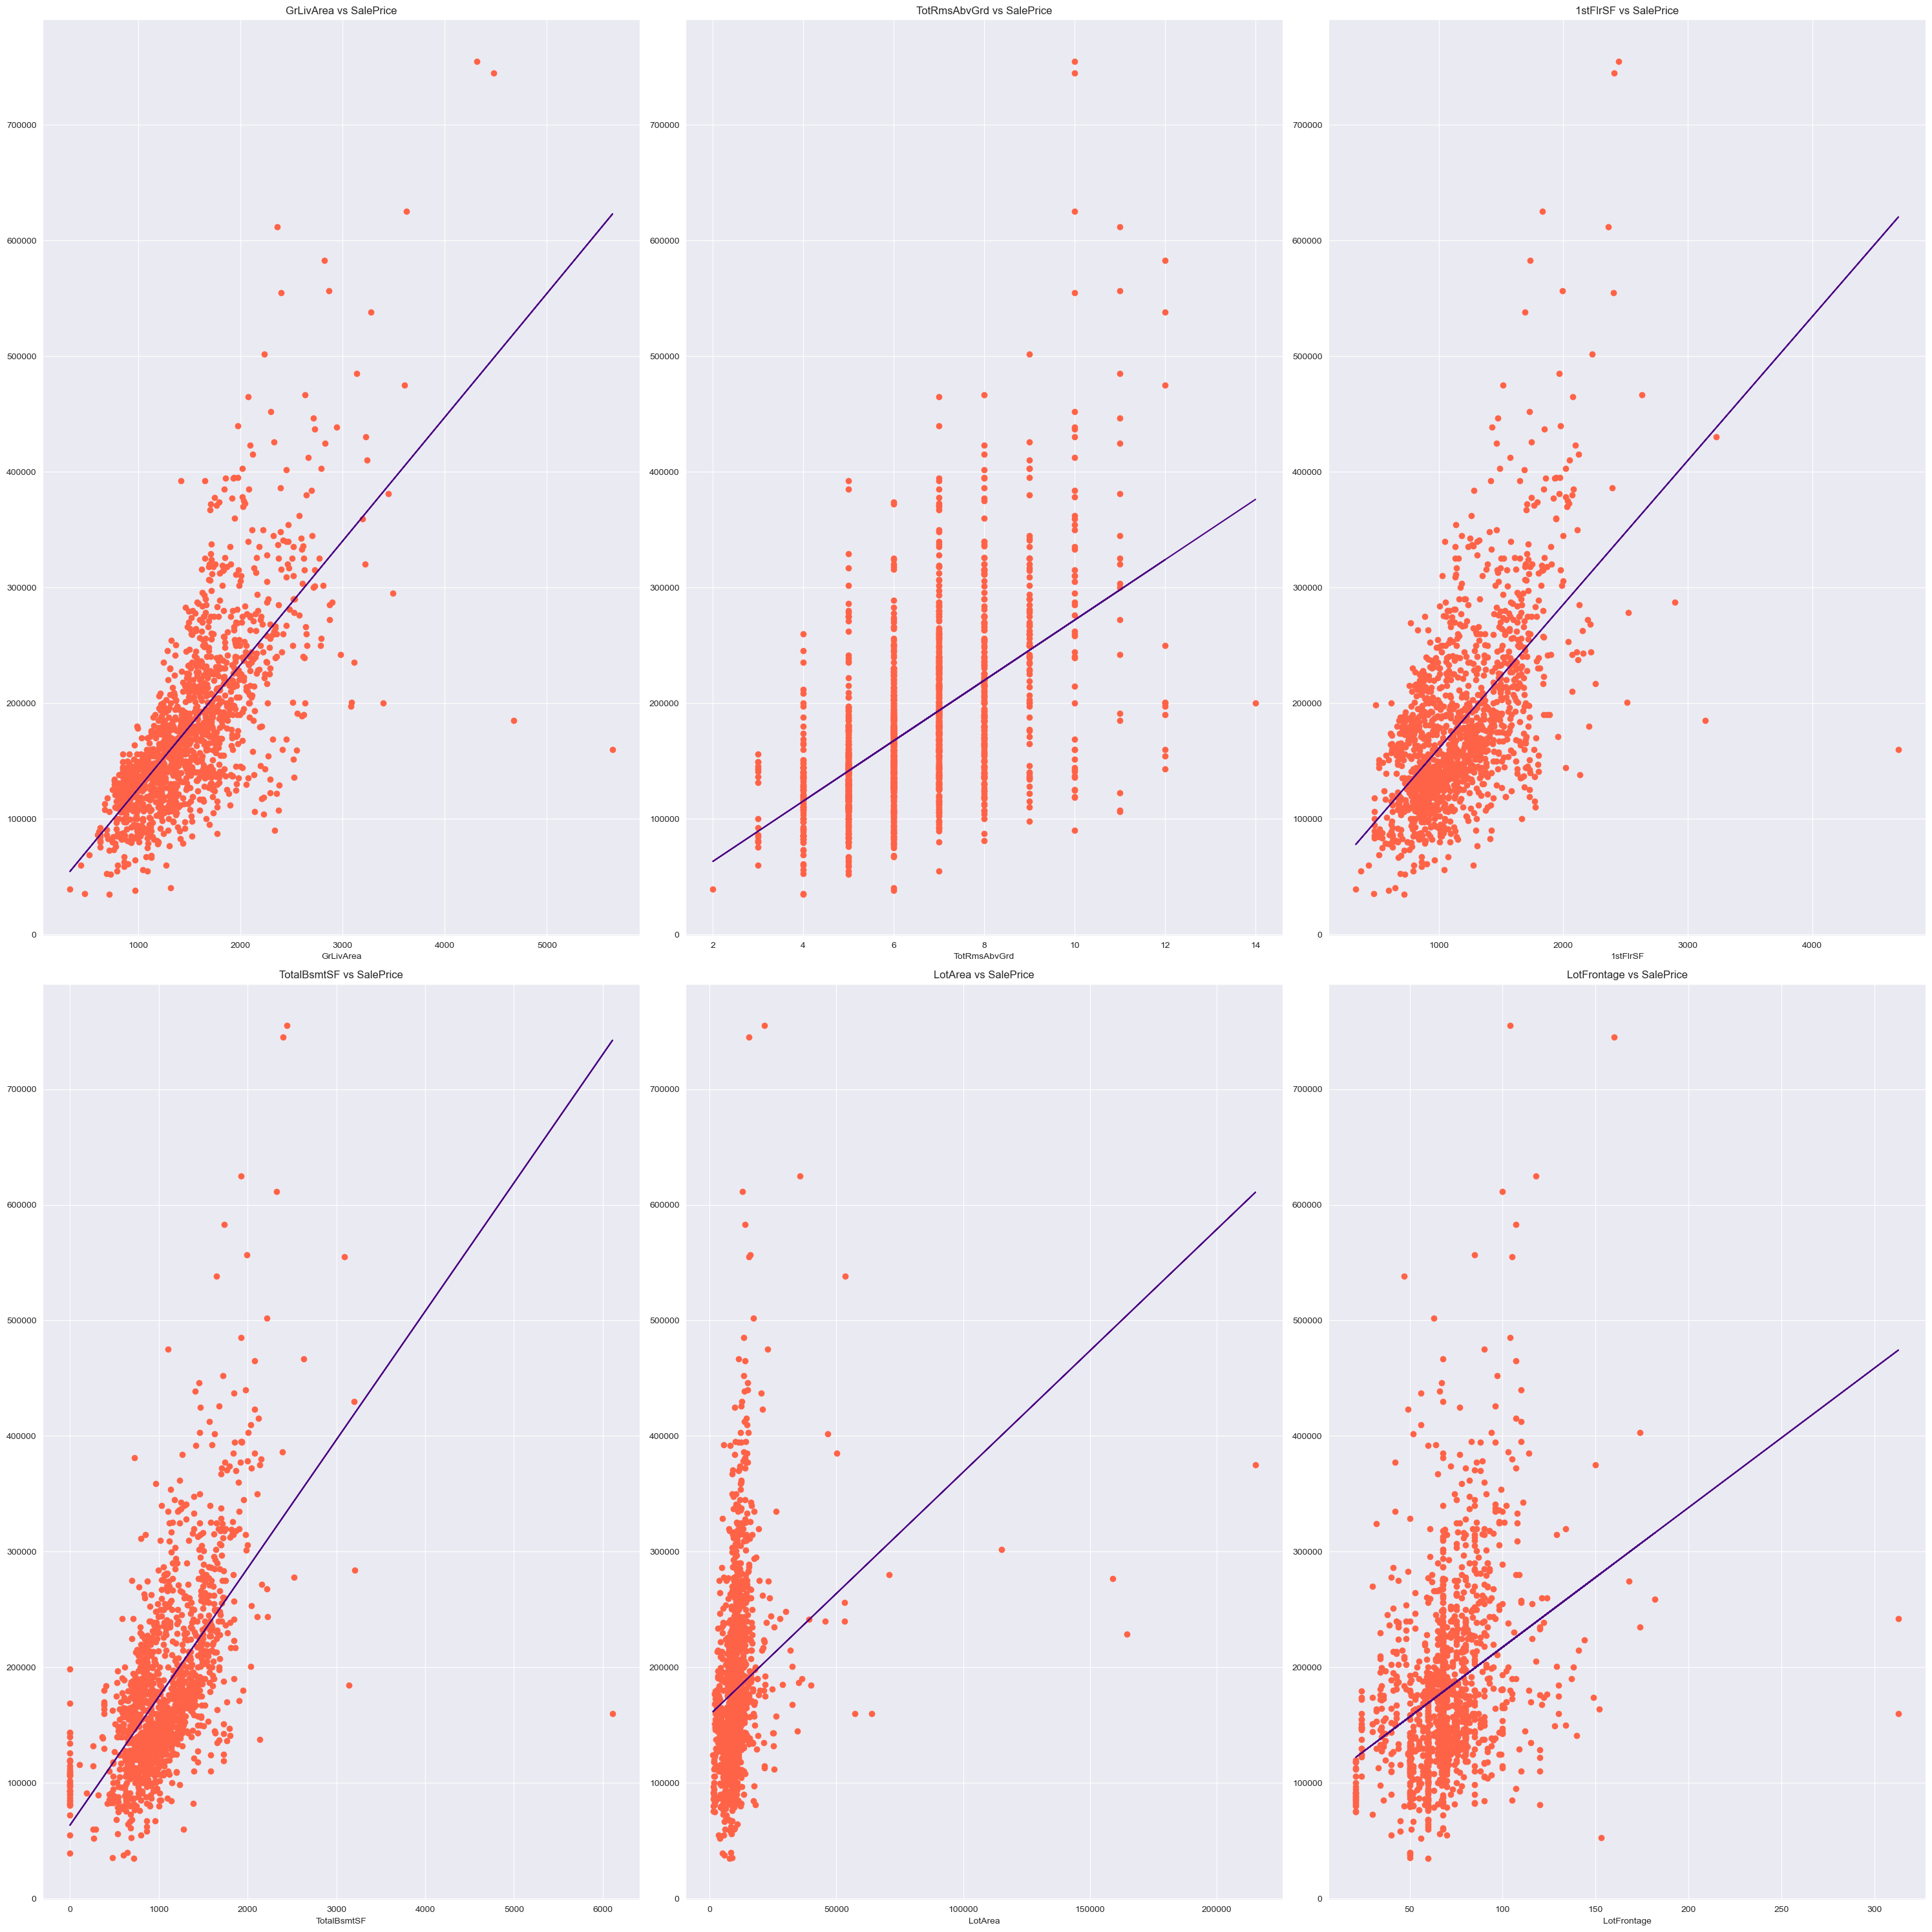

In [303]:
# The impact and correlation of GrLivArea and other surface-related variables on the distribution of selling prices
scatter_list = [['GrLivArea','TotRmsAbvGrd','1stFlrSF'],
                ['TotalBsmtSF','LotArea','LotFrontage']] # GarageYrBuilt is similar 
#print(np.array(scatter_list).shape)
fig, axs = plt.subplots(2,3,figsize=(30,30),tight_layout=True)

for i in range(0,2):
    for j in range(0,3):

        axs[i,j].scatter(train_drop_df[scatter_list[i][j]],train_drop_df.SalePrice,color = 'tomato')
        
        model1 = np.poly1d(np.polyfit(train_drop_df[scatter_list[i][j]], train_drop_df.SalePrice, 1))
        polyline = train_drop_df[scatter_list[i][j]].unique()
        axs[i,j].plot(polyline, model1(polyline), color='indigo')
        axs[i,j].set_xlabel(scatter_list[i][j])
        
        axs[i,j].set_title(scatter_list[i][j]+" vs SalePrice")
        
plt.tight_layout()

<font size=4 >It can be seen that there is a high degree of linear correlation between them.</font>

4.3 Overall Quality, and other Quality variables
---

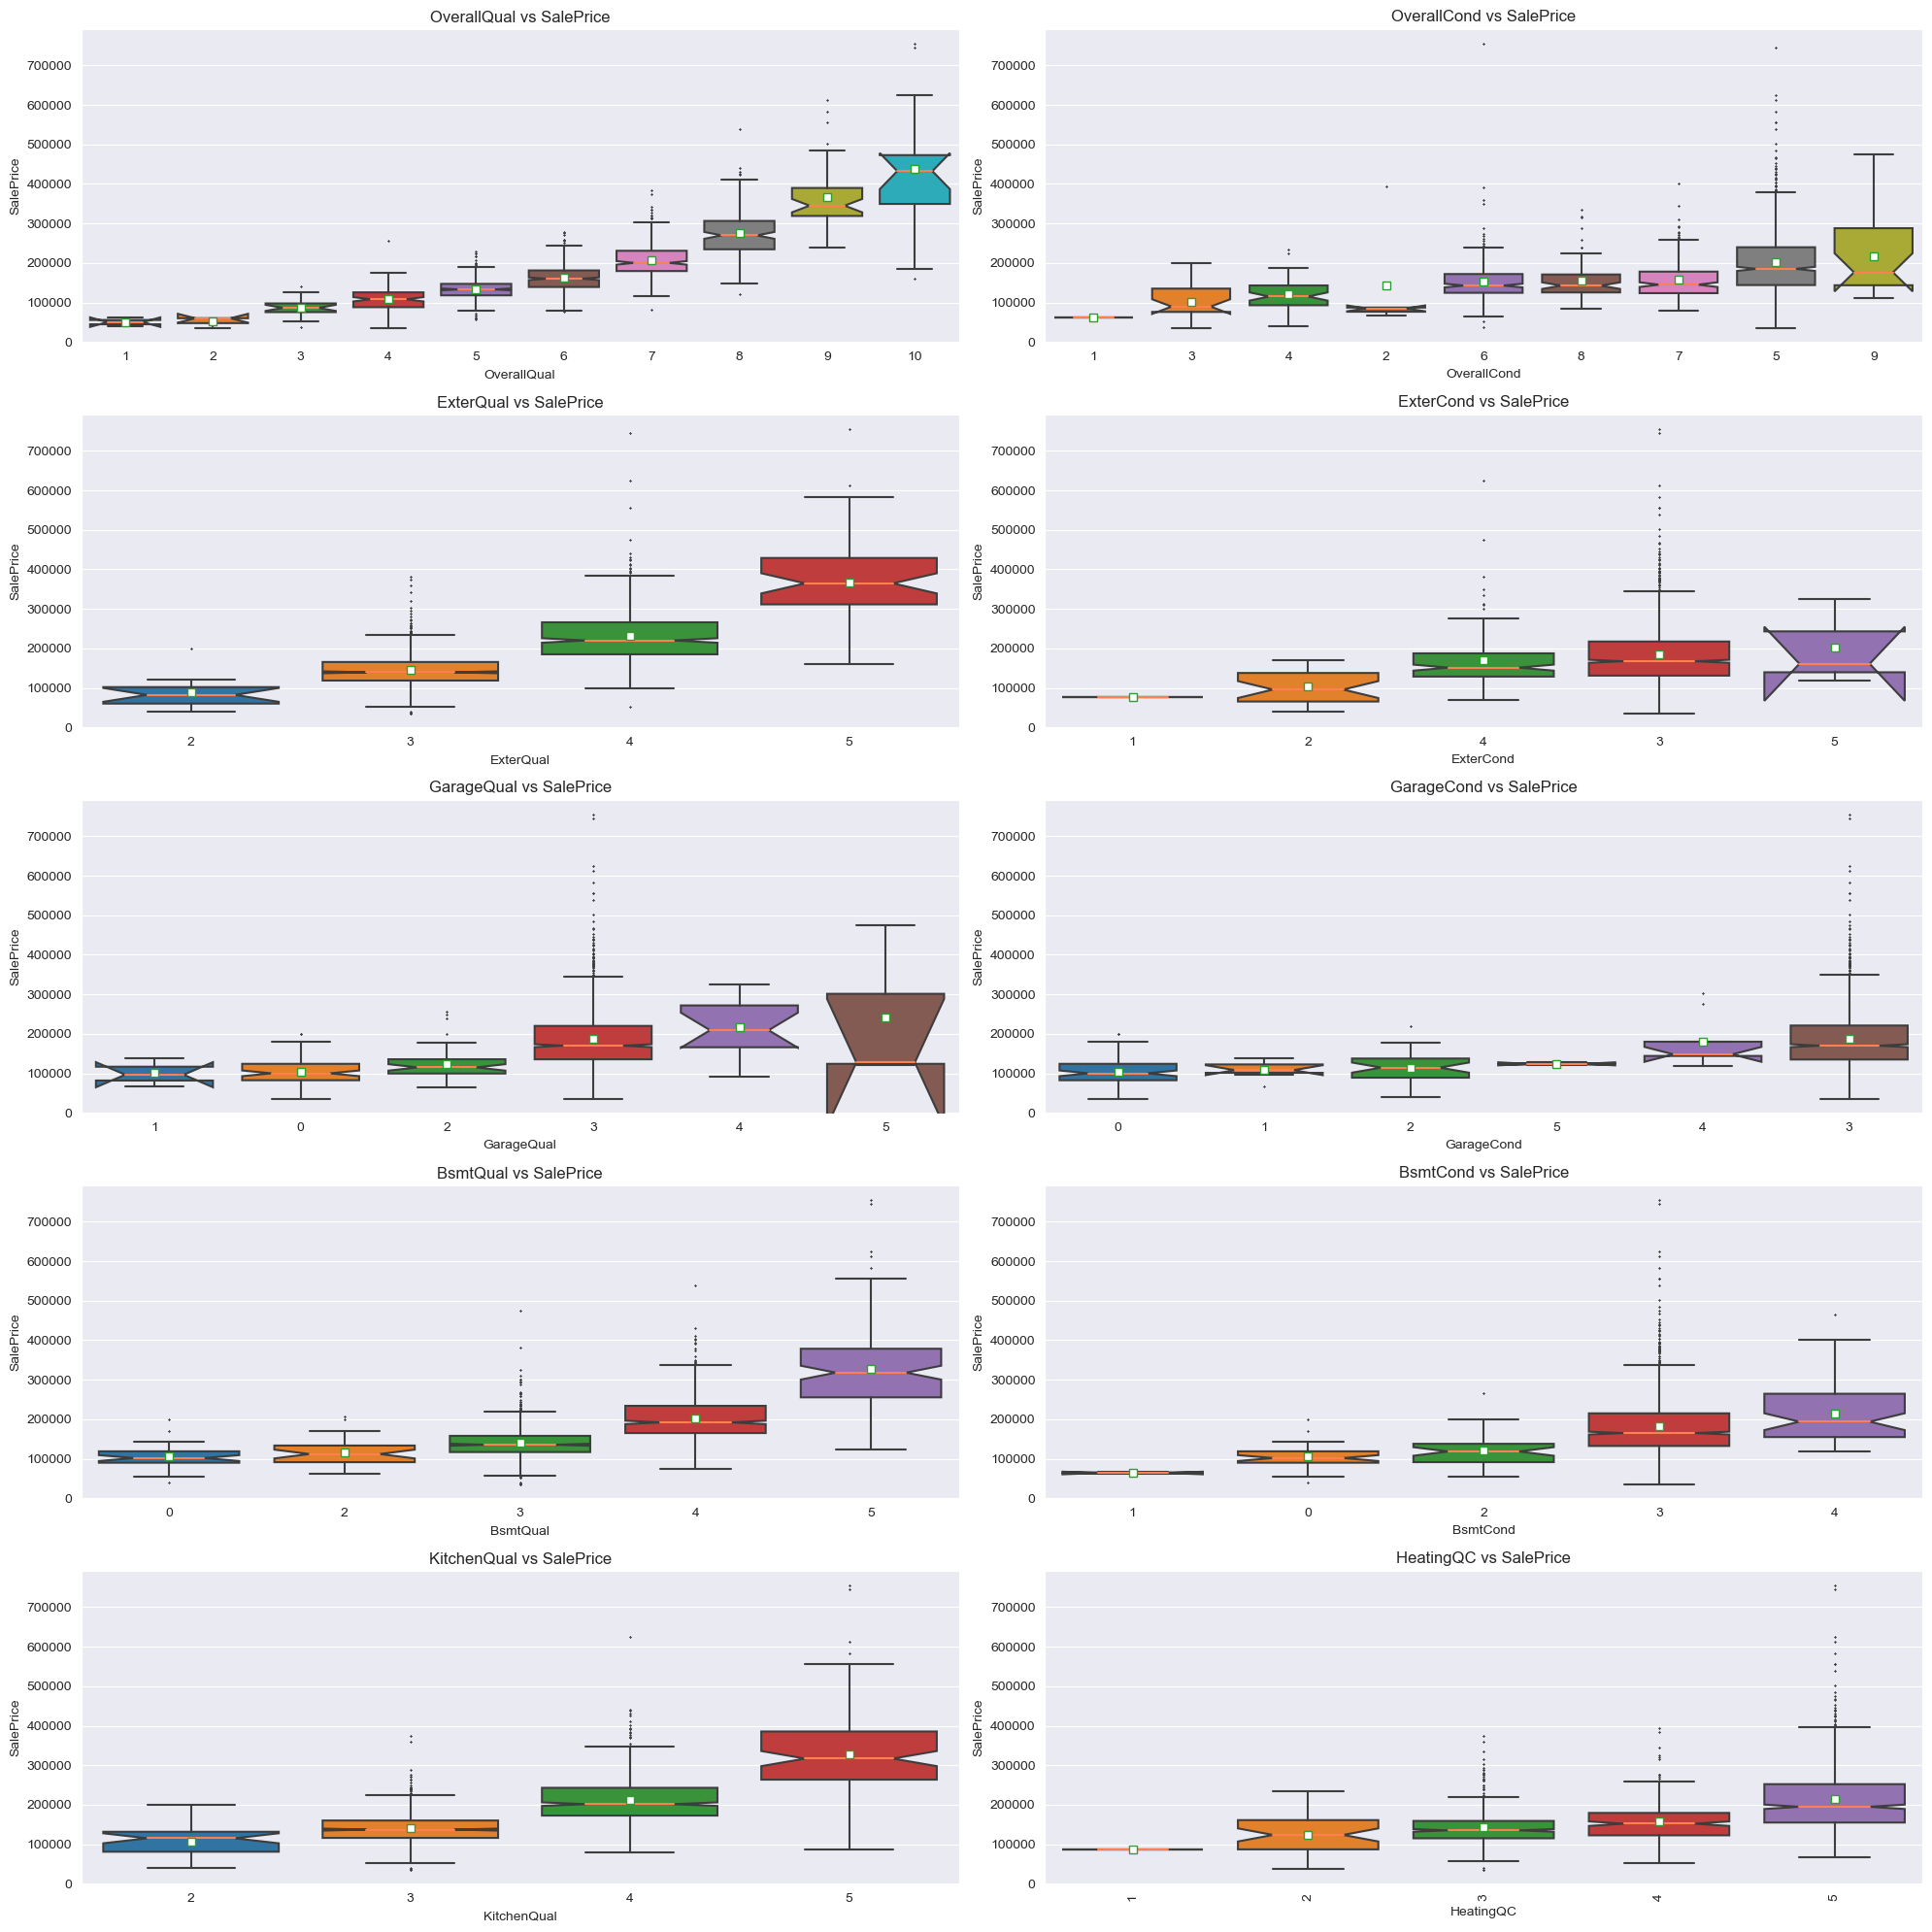

In [304]:
# The impact and correlation of Overall Quality, and other Quality variables on the distribution of selling prices
sns.set_style('darkgrid')


scatter_list = [["OverallQual","OverallCond"],
                ["ExterQual","ExterCond"],
                ["GarageQual","GarageCond"],
                ["BsmtQual","BsmtCond"],
                ["KitchenQual","HeatingQC"]]

fig, axs = plt.subplots(5,2,figsize=(20,20),tight_layout=True)

for i in range(0,5):

    for j in range(0,2):
        #print(i,j,scatter_list[i][j])
        order = train_drop_df.groupby([scatter_list[i][j]])['SalePrice'].mean().sort_values().index.values
        sns.boxplot(data=train_drop_df, x=scatter_list[i][j], y='SalePrice', fliersize=1, showmeans=True,
                flierprops={"marker": "x"}, medianprops={"color": "coral"}, notch=True, order=order,
                meanprops={"marker": "s", "markerfacecolor": "white"},ax = axs[i,j])
        plt.xticks(rotation=90)
        #plt.ylim(0, 500)

        axs[i,j].set_title(scatter_list[i][j]+" vs SalePrice")

plt.tight_layout()

<font size=4 >It can be seen that there is a high degree of linear correlation between them.</font>

4.4 Garage variables
---

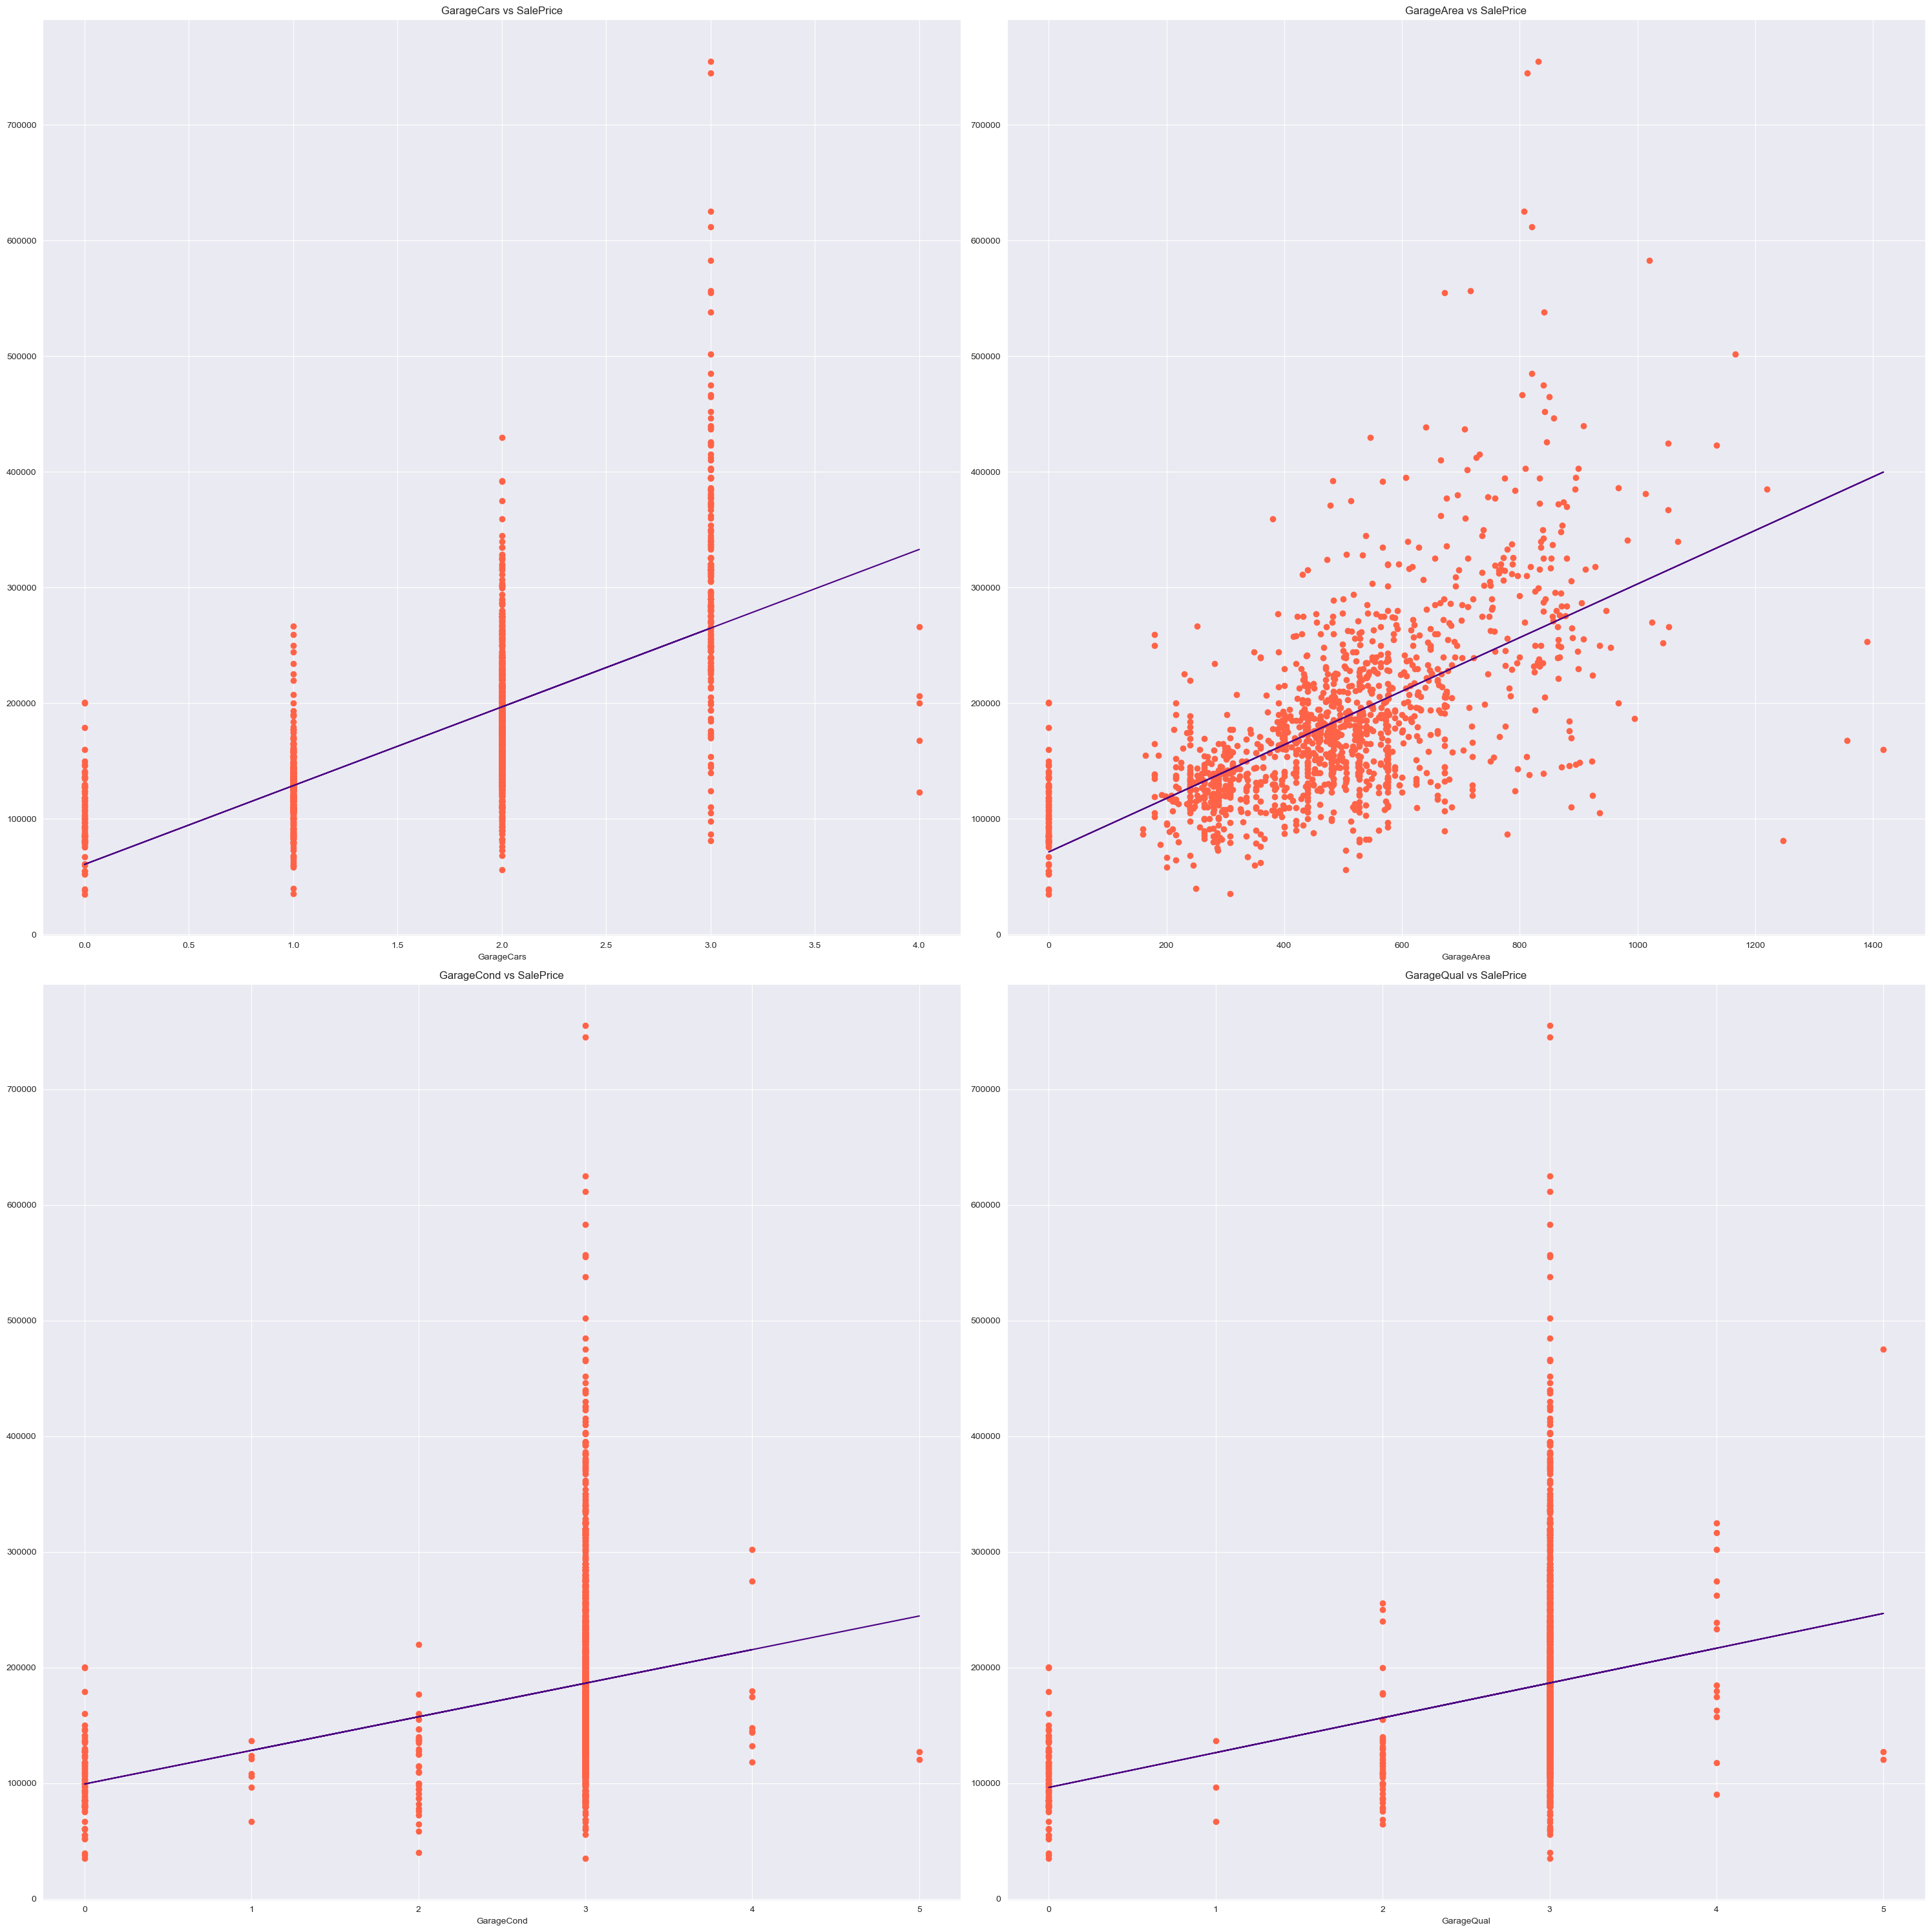

In [305]:
# The impact and correlation of Garage variables on the distribution of selling prices
scatter_list = [['GarageCars','GarageArea'],
                ['GarageCond','GarageQual'] ] 
#print(np.array(scatter_list).shape)
fig, axs = plt.subplots(2,2,figsize=(30,30),tight_layout=True)

for i in range(0,2):
    for j in range(0,2):

        # scatter(train_df[item],train_df.SalePrice,color = 'darkmagenta')
        axs[i,j].scatter(train_drop_df[scatter_list[i][j]],train_drop_df.SalePrice,color = 'tomato')
        
        model1 = np.poly1d(np.polyfit(train_drop_df[scatter_list[i][j]], train_drop_df.SalePrice, 1))
        polyline = train_drop_df[scatter_list[i][j]].unique()
        axs[i,j].plot(polyline, model1(polyline), color='indigo')
        axs[i,j].set_xlabel(scatter_list[i][j])
        
        axs[i,j].set_title(scatter_list[i][j]+" vs SalePrice")
        
#fig.delaxes(axs[2,1])      
plt.tight_layout()

4.5 Basement variables
---

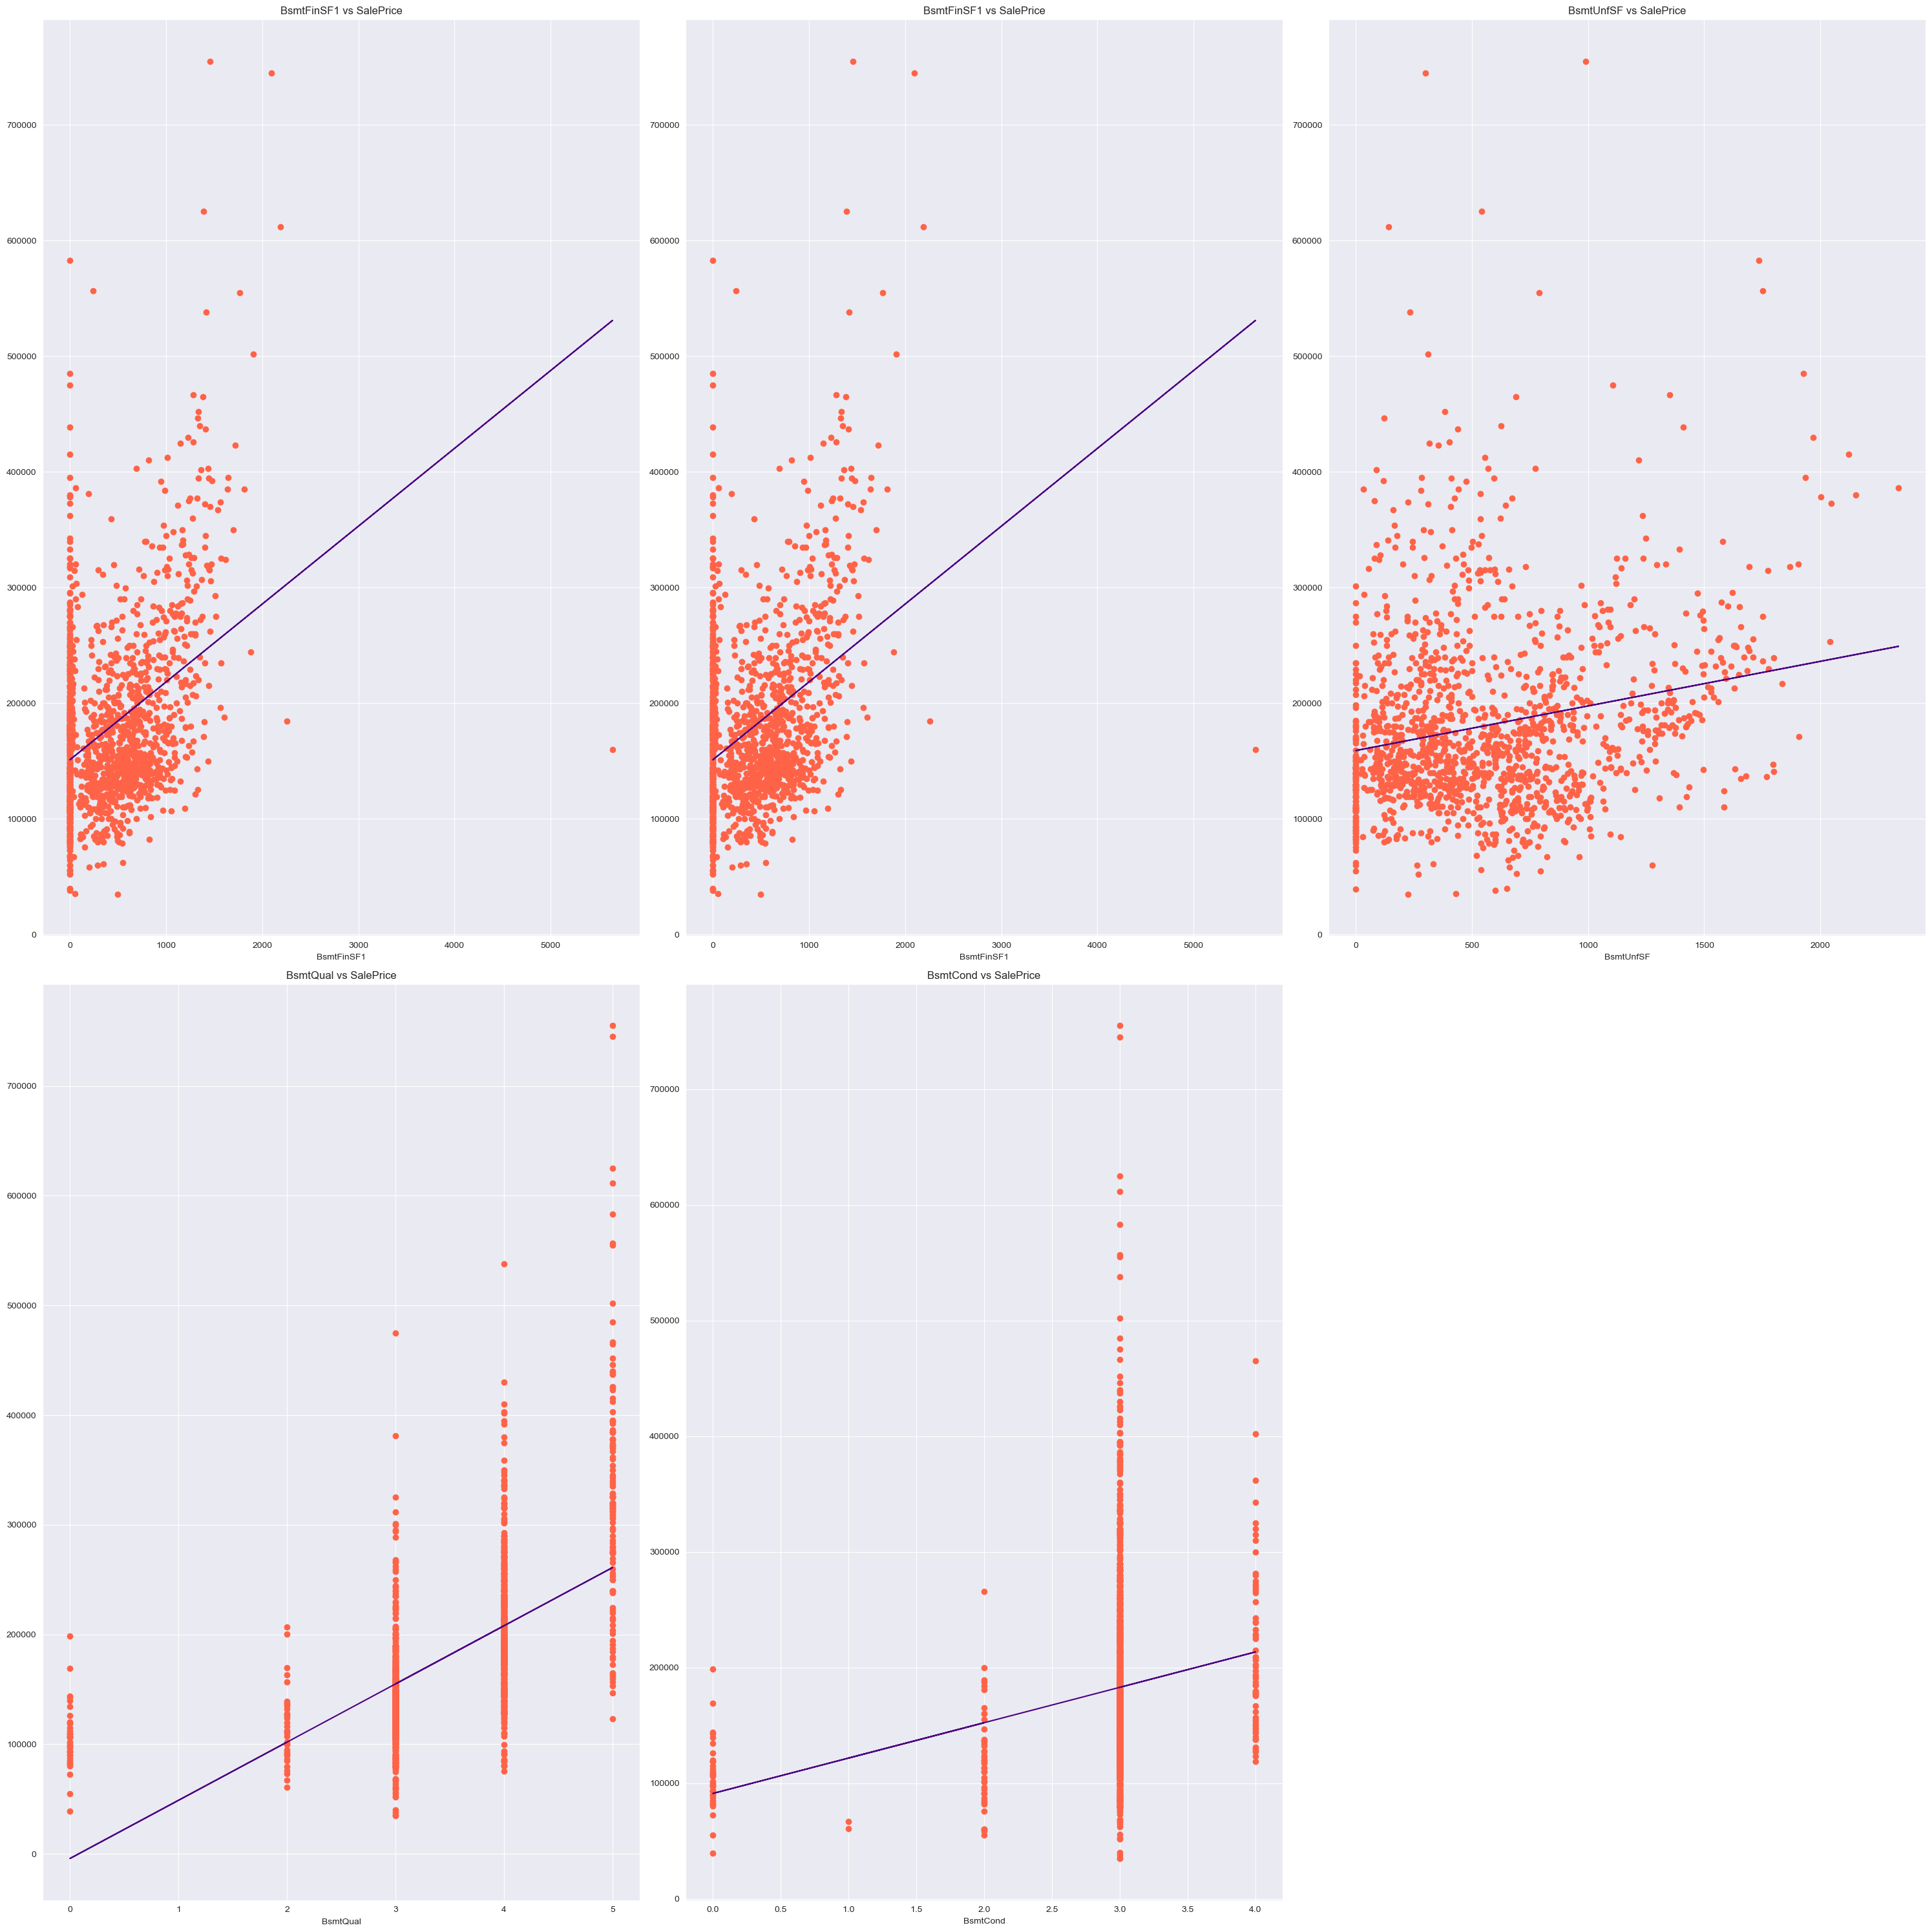

In [306]:
# The influence and correlation of Basement variables on the distribution of selling prices
scatter_list = [['BsmtFinSF1','BsmtFinSF1','BsmtUnfSF'],
                ['BsmtQual','BsmtCond','BsmtCond']  ] 
#print(np.array(scatter_list).shape)
fig, axs = plt.subplots(2,3,figsize=(30,30),tight_layout=True)

for i in range(0,2):

    for j in range(0,3):

        axs[i,j].scatter(train_drop_df[scatter_list[i][j]],train_drop_df.SalePrice,color = 'tomato')
        
        model1 = np.poly1d(np.polyfit(train_drop_df[scatter_list[i][j]], train_drop_df.SalePrice, 1))
        polyline = train_drop_df[scatter_list[i][j]].unique()
        axs[i,j].plot(polyline, model1(polyline), color='indigo')
        axs[i,j].set_xlabel(scatter_list[i][j])
        
        axs[i,j].set_title(scatter_list[i][j]+" vs SalePrice")
fig.delaxes(axs[1,2])         
plt.tight_layout()

<font size=4 >From the analysis, it can be observed that there seems to be no linear relationship between 'BsmtFinSF2' and 'BsmtFinType2' variables with housing prices. Therefore, I have decided to drop them.</font>

<font size=4 >Delete irrelevant data</font>

<font size=4 >Next, I will analyze the correlation between the category attribute and the house price in a visual way</font>

4.6 Neighborhood
---

Text(0.5, 1.0, 'Neighborhood vs SalePrice')

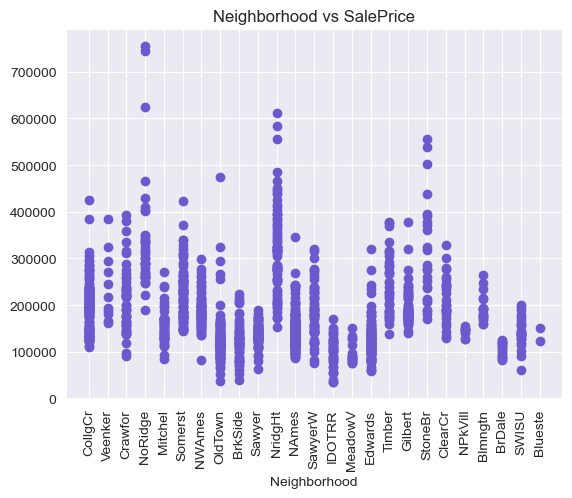

In [307]:
# A scatter plot of Neighborhood distribution and house selling prices
sns.set_style('darkgrid')
plt.scatter(train_drop_df.Neighborhood,train_drop_df.SalePrice,color = 'slateblue')
plt.xlabel("Neighborhood")
plt.xticks(rotation=90)
plt.title("Neighborhood vs SalePrice")

<font size=4 >It can be seen that 'NoRidge' has the highest house price, followed by 'NridgHt' and 'StoneBr'</font>

4.7 MSSubClass
---

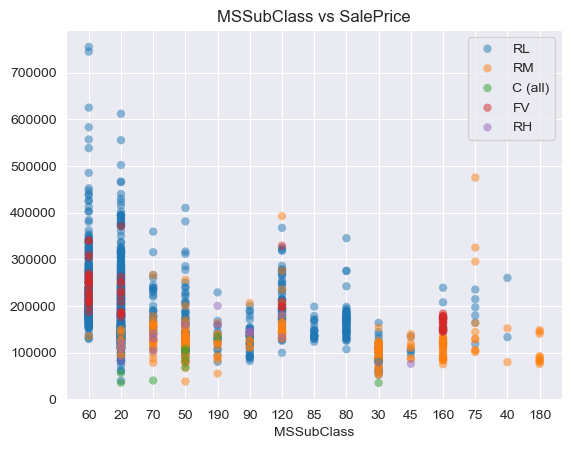

In [308]:
# Analyze the relationship between housing prices and MSSubClass
fig, ax = plt.subplots()
clolrs = train_drop_df['MSZoning'].unique()
for color in clolrs:
    color_df = train_drop_df.loc[train_drop_df['MSZoning'] == color]
    ax.scatter(color_df.MSSubClass, color_df.SalePrice, label=color,
               alpha=0.5, edgecolors='none')
ax.legend()
ax.grid(True)

plt.title("MSSubClass vs SalePrice")
plt.xlabel("MSSubClass")

plt.show()

4.8 Delete irrelevant columns
---

In [309]:
drop_list = ["Street","LotShape",  "LandContour", "LotConfig","LandSlope",
             "Condition1", "Condition2", "BldgType", "HouseStyle", "RoofStyle", 
              "RoofMatl", "Exterior1st", "Exterior2nd", "MasVnrType", "Foundation", 
             "PavedDrive", "SaleType", "SaleCondition", "BsmtExposure",  "BsmtFinType2"]
all_drop_df = all_drop_df.drop(columns=drop_list)

In [310]:
year_list = ["YearBuilt" ,"YearRemodAdd",
                "GarageYrBlt","MoSold","YrSold"]
all_drop_df = all_drop_df.drop(columns=year_list)

In [311]:
# Save the file in csv format for subsequent processing
all_drop_df.to_csv("all_drop_df.csv",index = False)

# View database column types
all_drop_df.info(verbose=True)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 1 to 2919
Data columns (total 35 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSSubClass    2919 non-null   object 
 1   MSZoning      2919 non-null   object 
 2   LotFrontage   2919 non-null   float64
 3   LotArea       2919 non-null   int64  
 4   Neighborhood  2919 non-null   object 
 5   OverallQual   2919 non-null   int64  
 6   OverallCond   2919 non-null   int64  
 7   ExterQual     2919 non-null   int64  
 8   ExterCond     2919 non-null   int64  
 9   BsmtQual      2919 non-null   int64  
 10  BsmtCond      2919 non-null   int64  
 11  BsmtFinType1  2919 non-null   object 
 12  BsmtFinSF1    2919 non-null   float64
 13  BsmtUnfSF     2919 non-null   float64
 14  TotalBsmtSF   2919 non-null   float64
 15  Heating       2919 non-null   object 
 16  HeatingQC     2919 non-null   int64  
 17  CentralAir    2919 non-null   object 
 18  Electrical    2919 non-null 